In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,6,8.0,NaN,1.0,NaN,4.0,3.0,7.0,1
4,4,1.0,NaN,3.0,2.0,1.0,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,NaN,1.0,2.0,1.0,NaN,1.0,1
679,2,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
680,5,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3
681,1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	50
float64		column 3	96
float64		column 4	16
float64		column 5	48
float64		column 6	16
float64		column 7	50
float64		column 8	16
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,633.000000,587.000000,667.000000,635.000000,667.000000,633.000000,667.000000,683.000000
mean,4.442167,3.069510,3.056218,2.782609,3.187402,3.557721,3.401264,2.851574,1.603221
std,2.820761,3.016553,2.854595,2.835182,2.195744,3.652415,2.411103,3.037381,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,4.000000,3.000000,4.000000,6.500000,4.000000,3.500000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

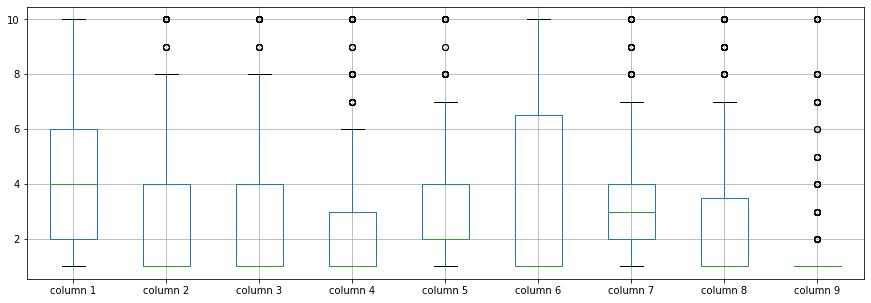

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.069510
column 3    3.056218
column 4    2.782609
column 5    3.187402
column 6    3.557721
column 7    3.401264
column 8    2.851574
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.623518,0.638322,0.479142,0.523470,0.600247,0.539983,0.530779,0.350957
column 2,0.623518,1.000000,0.900982,0.698015,0.749081,0.690484,0.747346,0.703815,0.458850
column 3,0.638322,0.900982,1.000000,0.651056,0.695662,0.701574,0.708639,0.703697,0.380765
column 4,0.479142,0.698015,0.651056,1.000000,0.577468,0.670509,0.648725,0.581394,0.404372
column 5,0.523470,0.749081,0.695662,0.577468,1.000000,0.594040,0.606039,0.619024,0.463412
column 6,0.600247,0.690484,0.701574,0.670509,0.594040,1.000000,0.677977,0.590873,0.351526
column 7,0.539983,0.747346,0.708639,0.648725,0.606039,0.677977,1.000000,0.650890,0.318148
column 8,0.530779,0.703815,0.703697,0.581394,0.619024,0.590873,0.650890,1.000000,0.423494
column 9,0.350957,0.458850,0.380765,0.404372,0.463412,0.351526,0.318148,0.423494,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+60,9+60+60,9+60+60,9+60+60+60+60,9+60+60+60,9+60+60,9+60,9], vae_layer = False, seed = 600)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 34.55092970530192
Epoch: 1 , loss: 34.50387732187907
Epoch: 2 , loss: 34.28012334732782
Epoch: 3 , loss: 33.56626510620117
Epoch: 4 , loss: 30.237456457955496
Epoch: 5 , loss: 27.909570285252162
Epoch: 6 , loss: 27.495639937264578
Epoch: 7 , loss: 26.979407582964217
Epoch: 8 , loss: 26.687062490554084
Epoch: 9 , loss: 26.345055807204474
Epoch: 10 , loss: 25.49360466003418
Epoch: 11 , loss: 25.217739559355238
Epoch: 12 , loss: 25.13297739483061
Epoch: 13 , loss: 24.865963799612864
Epoch: 14 , loss: 24.153181984311058
Epoch: 15 , loss: 24.22126881281535
Epoch: 16 , loss: 24.27509998139881
Epoch: 17 , loss: 23.559796923682804
Epoch: 18 , loss: 23.19720965340024
Epoch: 19 , loss: 23.264014289492653
Epoch: 20 , loss: 23.436179320017498
Epoch: 21 , loss: 22.886361144837878
Epoch: 22 , loss: 22.206493309565953
Epoch: 23 , loss: 21.959742069244385
Epoch: 24 , loss: 22.66432587305705
Epoch: 25 , loss: 21.9759999

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
1,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
2,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
3,0,0.0,-5.668332,0.0,-0.725674,0.0,0.000000,0.0,0
4,0,0.0,0.046924,0.0,0.000000,0.0,-1.850682,0.0,0
...,...,...,...,...,...,...,...,...,...
678,0,0.0,0.711397,0.0,0.000000,0.0,-0.163870,0.0,0
679,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
680,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
681,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(56.24287240353902, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.16772485234616236

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.000000,1.0,2.000000,1.0,3.000000,1.0,1
1,5,4.0,4.000000,5.0,7.000000,10.0,3.000000,2.0,1
2,3,1.0,1.000000,1.0,2.000000,2.0,3.000000,1.0,1
3,6,8.0,2.331668,1.0,2.274326,4.0,3.000000,7.0,1
4,4,1.0,1.046924,3.0,2.000000,1.0,1.149318,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.711397,1.0,2.000000,1.0,1.836130,1.0,1
679,2,1.0,1.000000,1.0,2.000000,1.0,3.000000,1.0,1
680,5,10.0,10.000000,10.0,4.000000,10.0,5.000000,6.0,3
681,1,1.0,1.000000,3.0,2.000000,1.0,1.000000,1.0,1


In [20]:
imputations[-1].to_excel("BCW_AW_5(imp).xlsx", index=False, header=False)